In [9]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np


# Initial conditions
def init():
    mc = 0
    rt_clock = 3
    non_rt_clock = 5
    n_rt = 0
    n_non_rt = 0
    server_status = 2
    scl = 4
    return mc, rt_clock, non_rt_clock, n_rt, n_non_rt, scl, server_status


# Addition of randomness
def sample(time):
    return -1 * time * math.log(random.uniform(0, 1))

In [10]:
# Graph generation
def get_graphs(rt, non_rt):
    rt_vals = []
    non_rt_vals = []
    rt_95_vals = []
    non_rt_95_vals = []
    for real, non_real in zip(rt, non_rt):
        real_batches = [real[i:i + b] for i in range(0, len(real), b)]
        non_real_batches = [non_real[i:i + b] for i in range(0, len(non_real), b)]
        real_batches.pop(0)
        non_real_batches.pop(0)
        
        r_b_mean, non_r_b_mean, r_b_95, non_r_b_95 = [], [], [], []
        
        for r_batch in real_batches:
            r_b_mean.append(sum(r_batch)/len(r_batch))
            r_b_95.append(np.percentile(r_batch, 95))
        for non_r_batch in non_real_batches:
            non_r_b_mean.append(sum(non_r_batch)/len(non_r_batch))
            non_r_b_95.append(np.percentile(non_r_batch, 95))

        
        # Graph for Mean for RT batch
        mu = sum(r_b_mean)/len(r_b_mean)
        interval = 1.96*np.sqrt(mu)/np.sqrt(b)
        percentile_95 = np.percentile(r_b_mean, 95)
        rt_vals.append(mu)
        plt.figure(figsize=(10,5))
        plt.title("Mean for RT batch")
        plt.hist(r_b_mean, 30, density=True, color="lightblue")
        plt.figtext(.2, .8, "Mean = " + str(round(mu, 2)) + "\n95th Percentile = " + str(round(percentile_95, 2)))
        plt.plot([mu,mu],[0, 8], 'k-', lw=4, color='green')
        plt.plot([mu-interval,mu-interval],[0, 8], 'k-', lw=2, color='navy')
        plt.plot([mu+interval,mu+interval],[0, 8], 'k-', lw=2, color='navy')
        
        act_mean = round(sum(non_r_b_mean)/len(non_r_b_mean), 2)
        non_rt_vals.append(act_mean)
        plt.figure(figsize=(20,10))
        x = 221
        for mu in [st_non_rt, act_mean]:
            interval = 1.96*np.sqrt(mu)/np.sqrt(b)
            percentile_95 = np.percentile(non_r_b_mean, 95)
            plt.subplot(x)
            x+=1
            plt.title("Mean for Non-RT batch")
            plt.hist(non_r_b_mean, 30, range=[mu-2*interval, mu+2*interval], density=True, color='pink')
            plt.figtext(.2, .8, "Mean = " + str(act_mean) + "\n95th Percentile = " + str(round(percentile_95, 2)))
            plt.plot([mu,mu],[0, 8], 'k-', lw=4, color='green')
            plt.plot([mu-interval,mu-interval],[0, 8], 'k-', lw=2, color='navy')
            plt.plot([mu+interval,mu+interval],[0, 8], 'k-', lw=2, color='navy')

            
        # Graph for 95th percentile RT batch
        mu = sum(r_b_95)/len(r_b_95)
        percentile_95 = np.percentile(r_b_95, 95)        
        interval = 1.96*np.sqrt(mu)/np.sqrt(b)
        rt_95_vals.append(percentile_95)
        plt.figure(figsize=(10,5))
        plt.title("95th percentile for RT batch")
        plt.hist(r_b_95, 30, density=True, color='lightgreen')
        plt.figtext(.2, .8, "Mean = " + str(round(mu, 2)) + "\n95th Percentile = " + str(round(percentile_95, 2)))
        plt.plot([percentile_95,percentile_95],[0, 2], 'k-', lw=4, color='green')
        plt.plot([percentile_95-interval,percentile_95-interval],[0, 2], 'k-', lw=2, color='navy')
        plt.plot([percentile_95+interval,percentile_95+interval],[0, 2], 'k-', lw=2, color='navy')

        
        # Graph for 95th percentile for Non-RT batch
        mu = sum(non_r_b_95)/len(non_r_b_95) 
        percentile_95 = np.percentile(non_r_b_95, 95)
        interval = 1.96*np.sqrt(mu)/np.sqrt(b)
        non_rt_95_vals.append(percentile_95)
        plt.figure(figsize=(10,5))
        plt.title("95th percentile for Non-RT batch")
        plt.hist(non_r_b_95, 30, density=True, color='orange')
        plt.figtext(.2, .8, "Mean = " + str(round(mu, 2)) + "\n95th Percentile = " + str(round(percentile_95, 2)))
        plt.plot([percentile_95,percentile_95],[0, 1.5], 'k-', lw=4, color='green')
        plt.plot([percentile_95-interval,percentile_95-interval],[0, 1.5], 'k-', lw=2, color='navy')
        plt.plot([percentile_95+interval,percentile_95+interval],[0, 1.5], 'k-', lw=2, color='navy')
        plt.show()
    plt.close()
    
    
    

In [11]:
# Performing simulation for RT and Non-RT signals with some randomness
def simulation_with_randomness(iat_rt, iat_non_rt, st_rt, st_non_rt, m, b):
    mc, rt_clock, non_rt_clock, n_rt, n_non_rt, scl, server_status = init()
    non_rt_queue = []
    elapsed_rt = []
    elapsed_non_rt = []
    while len(elapsed_rt) < m*b or len(elapsed_non_rt) < m*b:
        if rt_clock <= scl:
            mc = rt_clock
            n_rt += 1
            if scl - rt_clock != 0:
                non_rt_queue = [(scl - rt_clock, 0)] + non_rt_queue
                elapsed_non_rt.append((1, scl - rt_clock, mc))
                n_non_rt += 1
            if n_rt == 1:
                prev_rt_clock = rt_clock
                rt_clock = round(rt_clock + sample(iat_rt), 2)
                server_status = 1
                simulated_time = sample(st_rt)
                scl = round(mc + simulated_time, 2)
                n_rt -= 1
                elapsed_rt.append((rt_clock, simulated_time))
        elif non_rt_clock < scl:
            mc = non_rt_clock
            r_st_non_rt = sample(st_non_rt)
            non_rt_queue.append((r_st_non_rt, mc))
            elapsed_non_rt.append((0, r_st_non_rt, mc))
            n_non_rt += 1
            non_rt_clock = round(non_rt_clock + sample(iat_non_rt), 2)
            server_status = 2
            scl = round(mc + r_st_non_rt, 2)
        else:
            if mc == non_rt_clock:
                non_rt_clock = round(non_rt_clock + sample(iat_non_rt), 2)
                n_non_rt += 1
                sim_non_rt = sample(st_non_rt)
                non_rt_queue.append((sim_non_rt, mc))
                elapsed_non_rt.append((0,sim_non_rt, mc))
            elif non_rt_queue:
                n_non_rt -= 1
                server_status = 2
                scl = round(mc + non_rt_queue[0][0], 2)
                if non_rt_queue[0][1] == 0:
                    temp = elapsed_non_rt[0]
                    elapsed_non_rt.pop(0)
                    elapsed_non_rt.append((0, temp[1] + mc - temp[2] , -1))
                non_rt_queue.pop(0)
                
                
        if n_non_rt == 0 and n_rt == 0:
            server_status = 0
            scl = min(rt_clock, non_rt_clock)

        mc = scl
    return elapsed_rt, elapsed_non_rt

Mean inter-arrival time of RT messages7
Mean service time of an RT message2
Mean service time of a nonRT message4
Number of batches, m51
Batch size, b1000


/Users/araghug/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


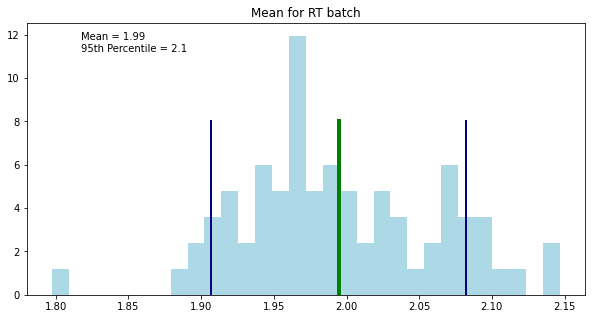

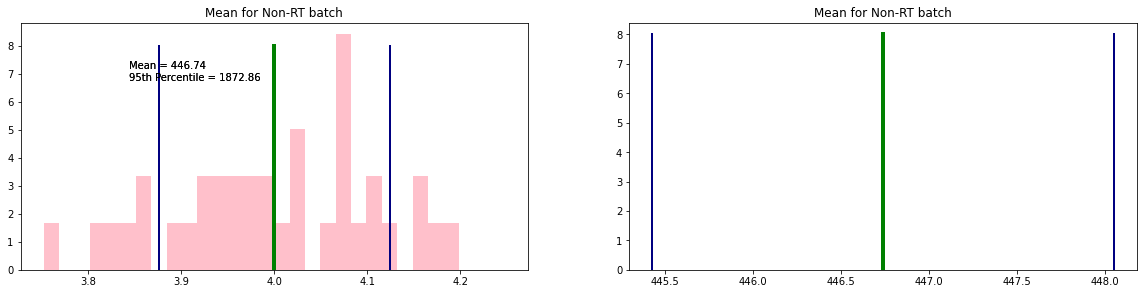

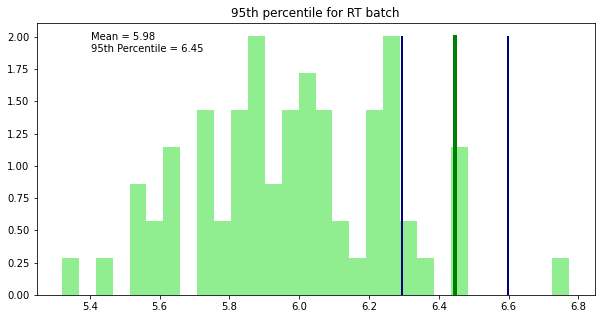

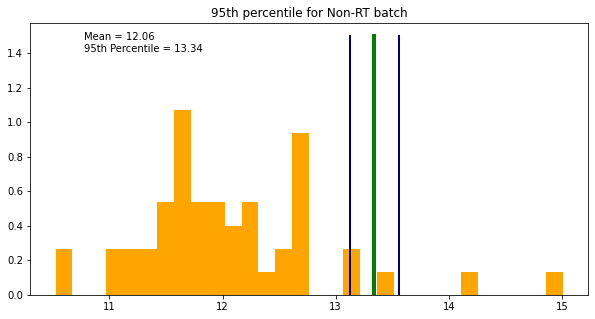

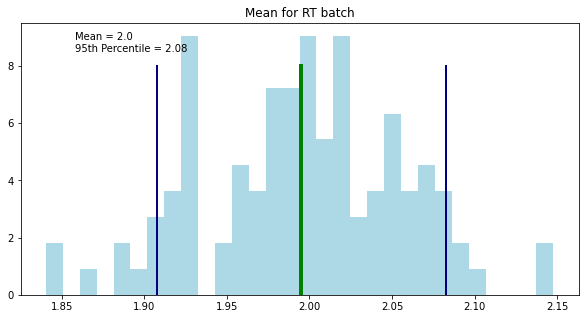

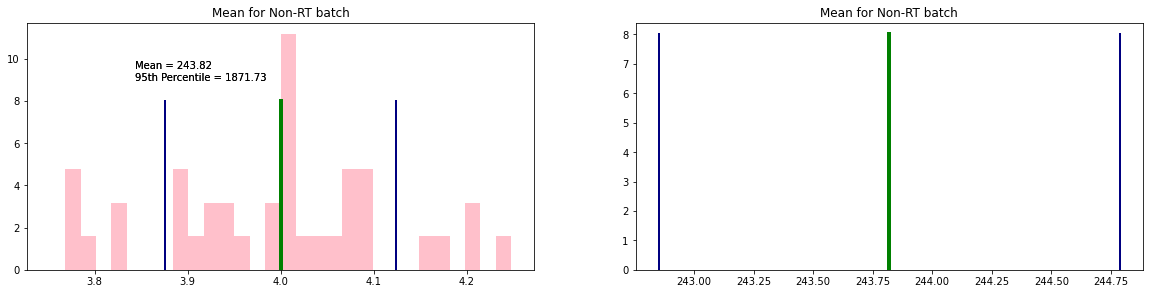

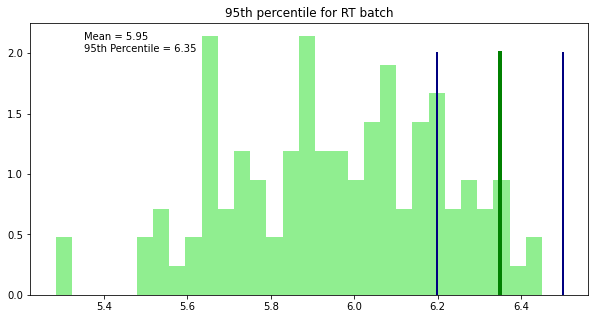

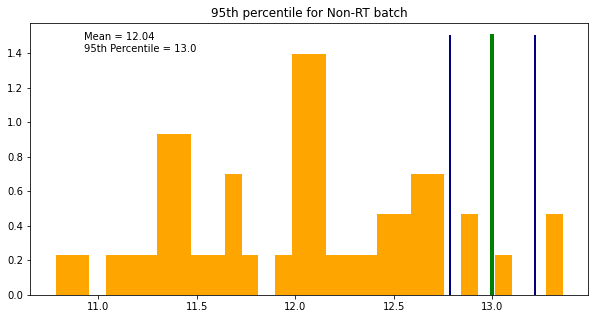

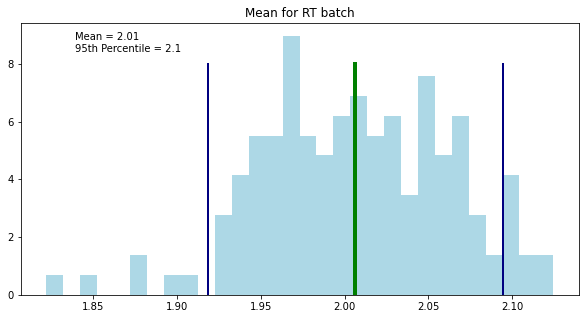

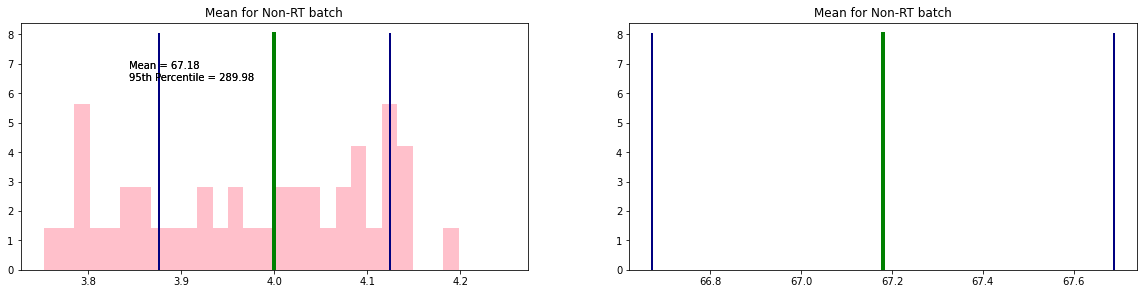

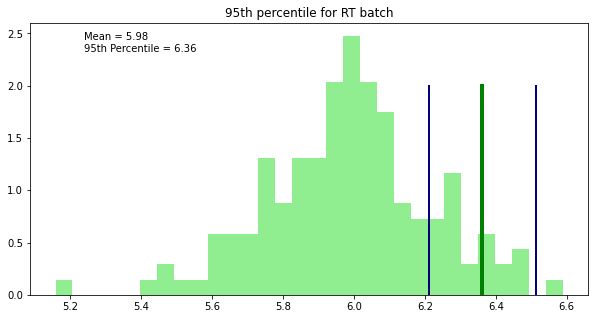

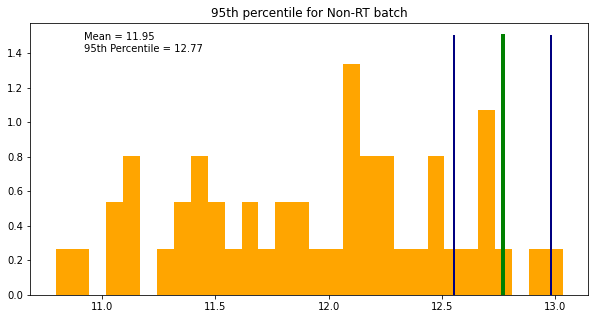

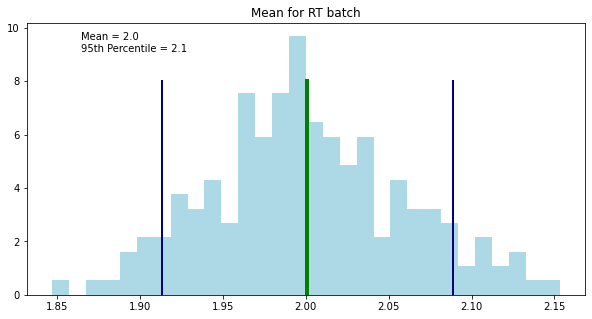

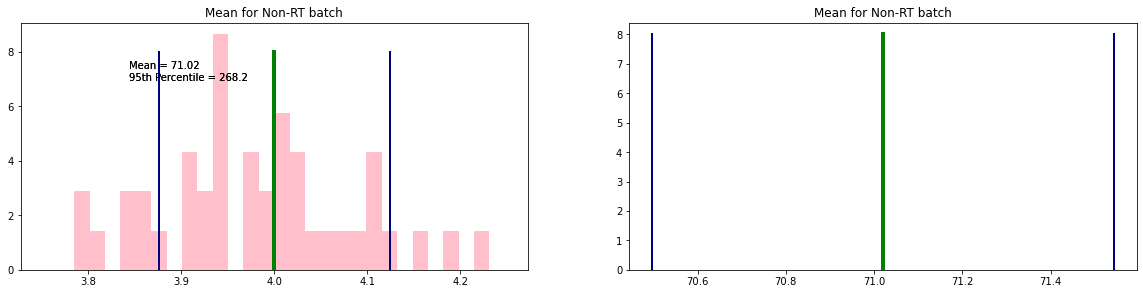

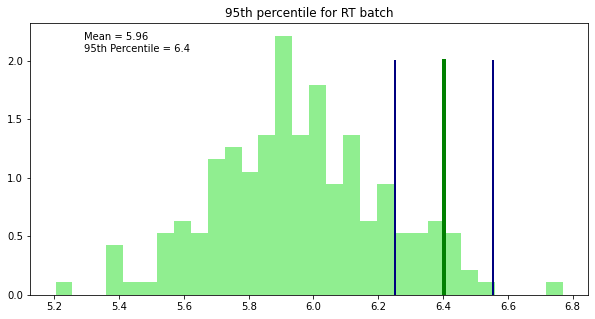

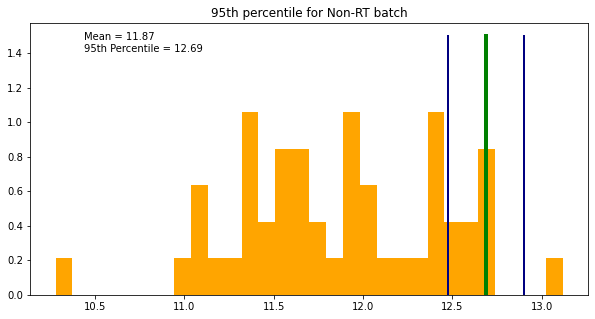

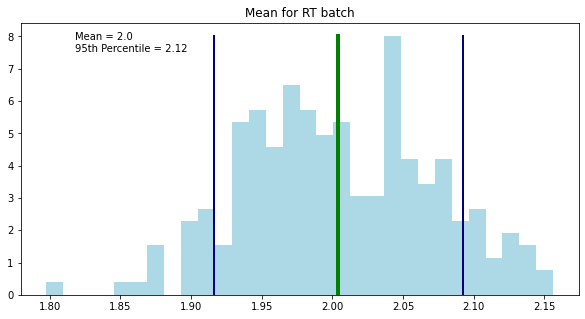

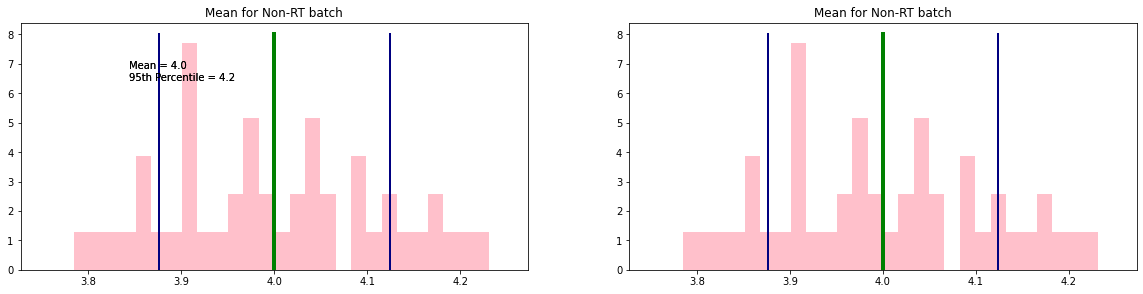

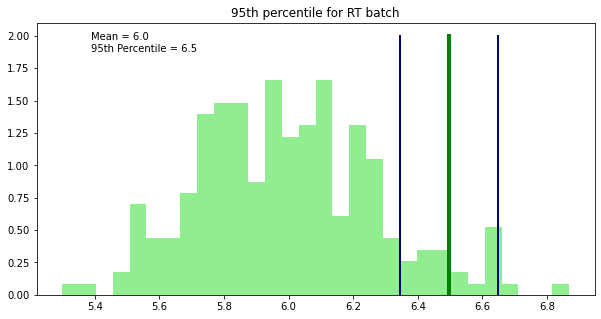

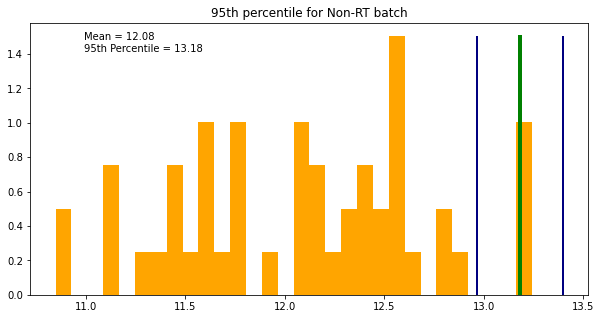

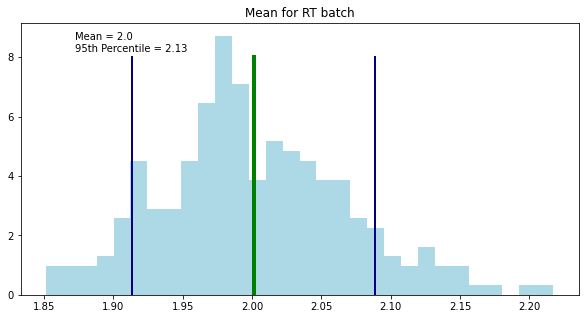

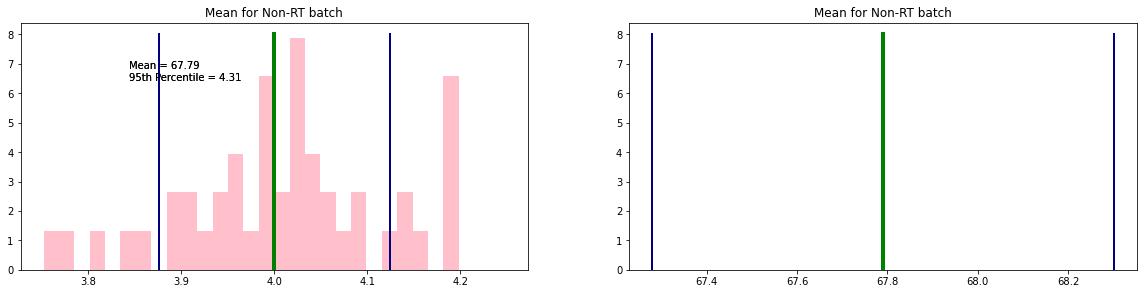

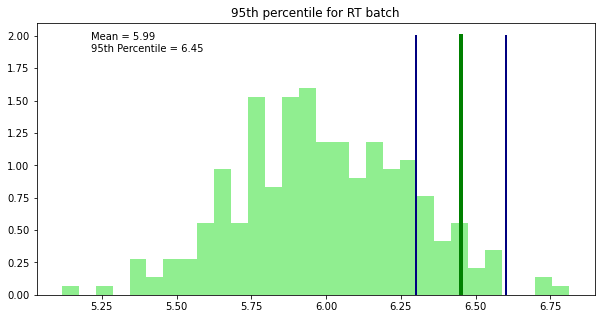

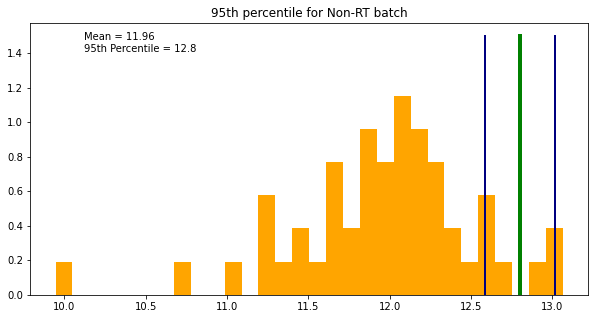

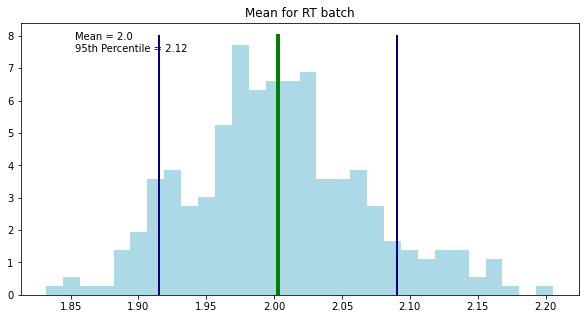

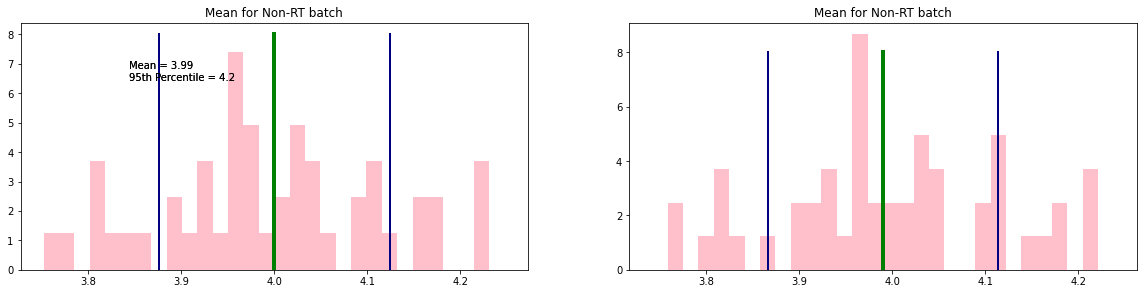

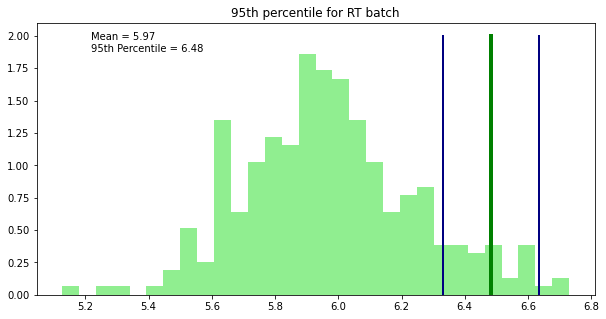

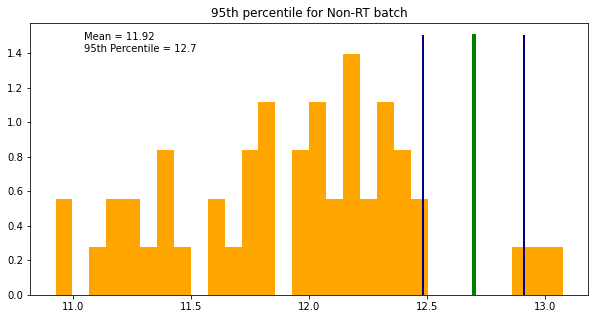

In [12]:
if __name__ == '__main__':
    iat_rt = int(input("Mean inter-arrival time of RT messages"))
#     Excluded iat_non_rt as I am automating the graph generation for each iteration
    st_rt = int(input("Mean service time of an RT message"))
    st_non_rt = int(input("Mean service time of a nonRT message"))
    m = int(input("Number of batches, m"))
    b = int(input("Batch size, b"))
    rt = []
    non_rt = []
    for i in range(10,41,5):
        x, y = simulation_with_randomness(iat_rt, i, st_rt, st_non_rt, m, b)
        rt.append(list(zip(*x))[1])
        non_rt.append(list(zip(*y))[1])
    get_graphs(rt, non_rt)